In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
# mouse_data_df
clinical_data_df

# Combine the data into a single dataset
combined_data = pd.merge(clinical_data_df, mouse_data_df, on="Mouse ID")



# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_data['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor = combined_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_tumor_df = pd.DataFrame(mean_tumor)
mean_tumor_df = mean_tumor_df.reset_index()
# Preview DataFrame
mean_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# mean_tumor = combined_data['Drug'].count()
# Convert to DataFrame
# mean_tumor = me
# Preview DataFrame

error_tumor = combined_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
error_tumor_df = pd.DataFrame(error_tumor)
error_tumor_df = error_tumor_df.reset_index()
# Preview DataFrame
error_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
re_format = mean_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# re_format
re_format_error = error_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
re_format_error
re_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


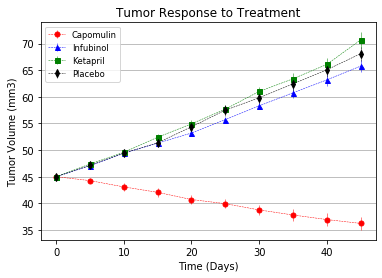

In [5]:
plt.errorbar(re_format.index, re_format["Capomulin"], yerr=re_format_error["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(re_format.index, re_format["Infubinol"], yerr=re_format_error["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(re_format.index, re_format["Ketapril"], yerr=re_format_error["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(re_format.index, re_format["Placebo"], yerr=re_format_error["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
# Save the Figure
# plt.savefig(“analysis/Fig1.png”)
# Show the Figure
plt.show()


In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# mean_tumor
# Convert to DataFrame

# Preview DataFrame


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# mean_tumor = combined_data['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor = combined_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
mean_tumor_df = pd.DataFrame(mean_tumor)

# Preview DataFrame
mean_tumor_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
error_tumor = combined_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
error_tumor_df = pd.DataFrame(error_tumor)
# Preview DataFrame
error_tumor_df.head()






Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df = mean_tumor_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']


error_tumor_df = error_tumor_df.reset_index()
error_tumor_df = error_tumor_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

mean_tumor_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


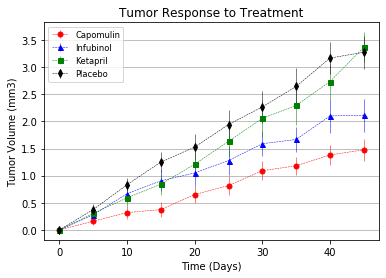

In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

# plt.errorbar(re_format.index, re_format["Capomulin"],yerr=re_format_error["Capomulin"], color="r")
# plt.errorbar(re_format.index, re_format["Infubinol"],yerr=re_format_error["Infubinol"], color="b")
# plt.errorbar(re_format.index, re_format["Ketapril"],yerr=re_format_error["Ketapril"], color="g")
# plt.errorbar(re_format.index, re_format["Placebo"],yerr=re_format_error["Placebo"], color="y")
# # plt.errorbar(loc='best')
# plt.show()



plt.errorbar(mean_tumor_df.index, mean_tumor_df["Capomulin"], yerr=error_tumor_df["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_df.index, mean_tumor_df["Infubinol"], yerr=error_tumor_df["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_df.index, mean_tumor_df["Ketapril"], yerr=error_tumor_df["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_df.index, mean_tumor_df["Placebo"], yerr=error_tumor_df["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
# Save the Figure
# plt.savefig(“analysis/Fig1.png”)
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# count_tumor = combined_data['Tumor Volume (mm3)'].count()
# # Convert to DataFrame
# count_tumor = combined_data.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
# count_tumor_df = pd.DataFrame(count_tumor)
# count_tumor_df = count_tumor_df.reset_index()
# # Preview DataFrame
# count_tumor_df.head()

# mouse_data_df

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_tumor = combined_data['Mouse ID'].count()

# Convert to DataFrame
count_tumor = combined_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
count_tumor_df = pd.DataFrame(count_tumor)
count_tumor_df = count_tumor_df.reset_index()
# Preview DataFrame
count_tumor_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
reformat_count = count_tumor_df.pivot(index='Timepoint', columns='Drug')['Mouse ID']
reformat_count.head()
# reformat_error = error_tumor_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# re_format_error
# re_format.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


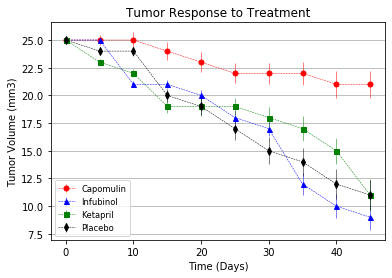

In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure


# plt.errorbar(x, y + 3, yerr=yerr, label='Drug Timepoint')

# plt.errorbar(reformat_count.index, reformat_count["Capomulin"],yerr=re_format_error["Capomulin"], color="r")
# plt.errorbar(reformat_count.index, reformat_count["Infubinol"],yerr=re_format_error["Infubinol"], color="b")
# plt.errorbar(reformat_count.index, reformat_count["Ketapril"],yerr=re_format_error["Ketapril"], color="g")
# plt.errorbar(reformat_count.index, reformat_count["Placebo"],yerr=re_format_error["Placebo"], color="y")
# plt.show()

plt.errorbar(reformat_count.index, reformat_count["Capomulin"], yerr=re_format_error["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(reformat_count.index, reformat_count["Infubinol"], yerr=re_format_error["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(reformat_count.index, reformat_count["Ketapril"], yerr=re_format_error["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(reformat_count.index, reformat_count["Placebo"], yerr=re_format_error["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
# Save the Figure
# plt.savefig(“analysis/Fig1.png”)
# Show the Figure
plt.show()








![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm
tumor_mean_perc = 100 * (reformat_count.iloc[-1] - reformat_count.iloc[0])/reformat_count.iloc[0]
tumor_sem_perc = 100 * (re_format.iloc[-1] - re_format.iloc[0])/re_format.iloc[0]
tumor_sem_perc

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

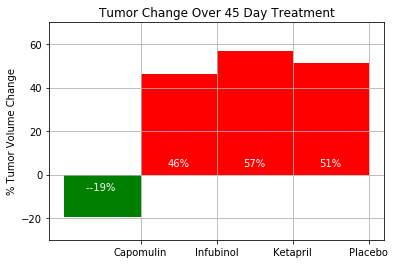

In [15]:
# Store all Relevant Percent Changes into a Tuple
tumor_change = (tumor_sem_perc["Capomulin"], 
               tumor_sem_perc["Infubinol"], 
               tumor_sem_perc["Ketapril"], 
               tumor_sem_perc["Placebo"])
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(tumor_change))  
width = 1
rectsPass = ax.bar(ind[0], tumor_change[0], width, color='green')
rectsFail = ax.bar(ind[1:], tumor_change[1:], width, color='red')
# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)
# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Save the Figure
# fig.savefig("analysis/Fig4.png")
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)